In [41]:
%matplotlib notebook

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [44]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", "suicides_no": "Suicide Count", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# Filter down countries 
target_countries= filtered_date_df.loc[(filtered_date_df['Country']== "United States")|  (filtered_date_df["Country"]== "Canada") | (filtered_date_df["Country"]== "Mexico") | (filtered_date_df["Country"]== "Antigua and Barbuda")|(filtered_date_df["Country"]== "Argentina")|(filtered_date_df["Country"]== "Bahamas")| (filtered_date_df["Country"]== "Barbados")|(filtered_date_df["Country"]== "Belize")|(filtered_date_df["Country"]== "Brazil")| (filtered_date_df["Country"]== "Chile")|(filtered_date_df["Country"]== "Colombia")|(filtered_date_df["Country"]== "Costa Rica")|(filtered_date_df["Country"]== "Cuba")| (filtered_date_df["Country"]== "Ecuador")|  (filtered_date_df["Country"]== "El Salvador")| (filtered_date_df["Country"]== "Grenada")| (filtered_date_df["Country"]== "Guatemala")| (filtered_date_df["Country"]== "Jamaica")|(filtered_date_df["Country"]== "Nicaragua")| (filtered_date_df["Country"]== "Panama")| (filtered_date_df["Country"]== "Paraguay")| (filtered_date_df["Country"]== "Puerto Rico")| (filtered_date_df["Country"]== "Saint Lucia")| (filtered_date_df["Country"]== "Saint Vincent and Grenadines")| (filtered_date_df["Country"]== "Suriname")| (filtered_date_df["Country"]== "Trinidad and Tobago")| (filtered_date_df["Country"] == "Uruguay"), :]

target_countries_df= pd.DataFrame(target_countries)

# Display table
target_countries_df.head()

,Country,Year,Sex,Age Range,Suicide Count,Suicides/100k pop,GDP(Year)
420,Antigua and Barbuda,2000,male,55-74,1,30.00,830158778
421,Antigua and Barbuda,2000,male,35-54,1,9.97,830158778
422,Antigua and Barbuda,2000,female,15-24,0,0.00,830158778
423,Antigua and Barbuda,2000,female,25-34,0,0.00,830158778
424,Antigua and Barbuda,2000,female,35-54,0,0.00,830158778


In [45]:
# group by year and country / find averages

country_gdp = target_countries_df.groupby(["Country", "Year"])["GDP(Year)"].mean()
country_suicide = target_countries_df.groupby(["Country", "Year"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

country_summary_reset_df = country_summary_df.reset_index()

# display table
country_summary_reset_df


,Country,Year,GDP Mean,Suicide Rate Mean
0,Antigua and Barbuda,2000,830158778,3.330833
1,Antigua and Barbuda,2001,800740259,1.620833
2,Antigua and Barbuda,2002,814615333,0.000000
3,Antigua and Barbuda,2003,855643111,2.318333
4,Antigua and Barbuda,2004,919577148,3.005000
...,...,...,...,...
392,Uruguay,2010,40284481652,21.452500
393,Uruguay,2012,51264390116,22.029167
394,Uruguay,2013,57531233351,20.757500
395,Uruguay,2014,57236013086,20.720000


<IPython.core.display.Javascript object>


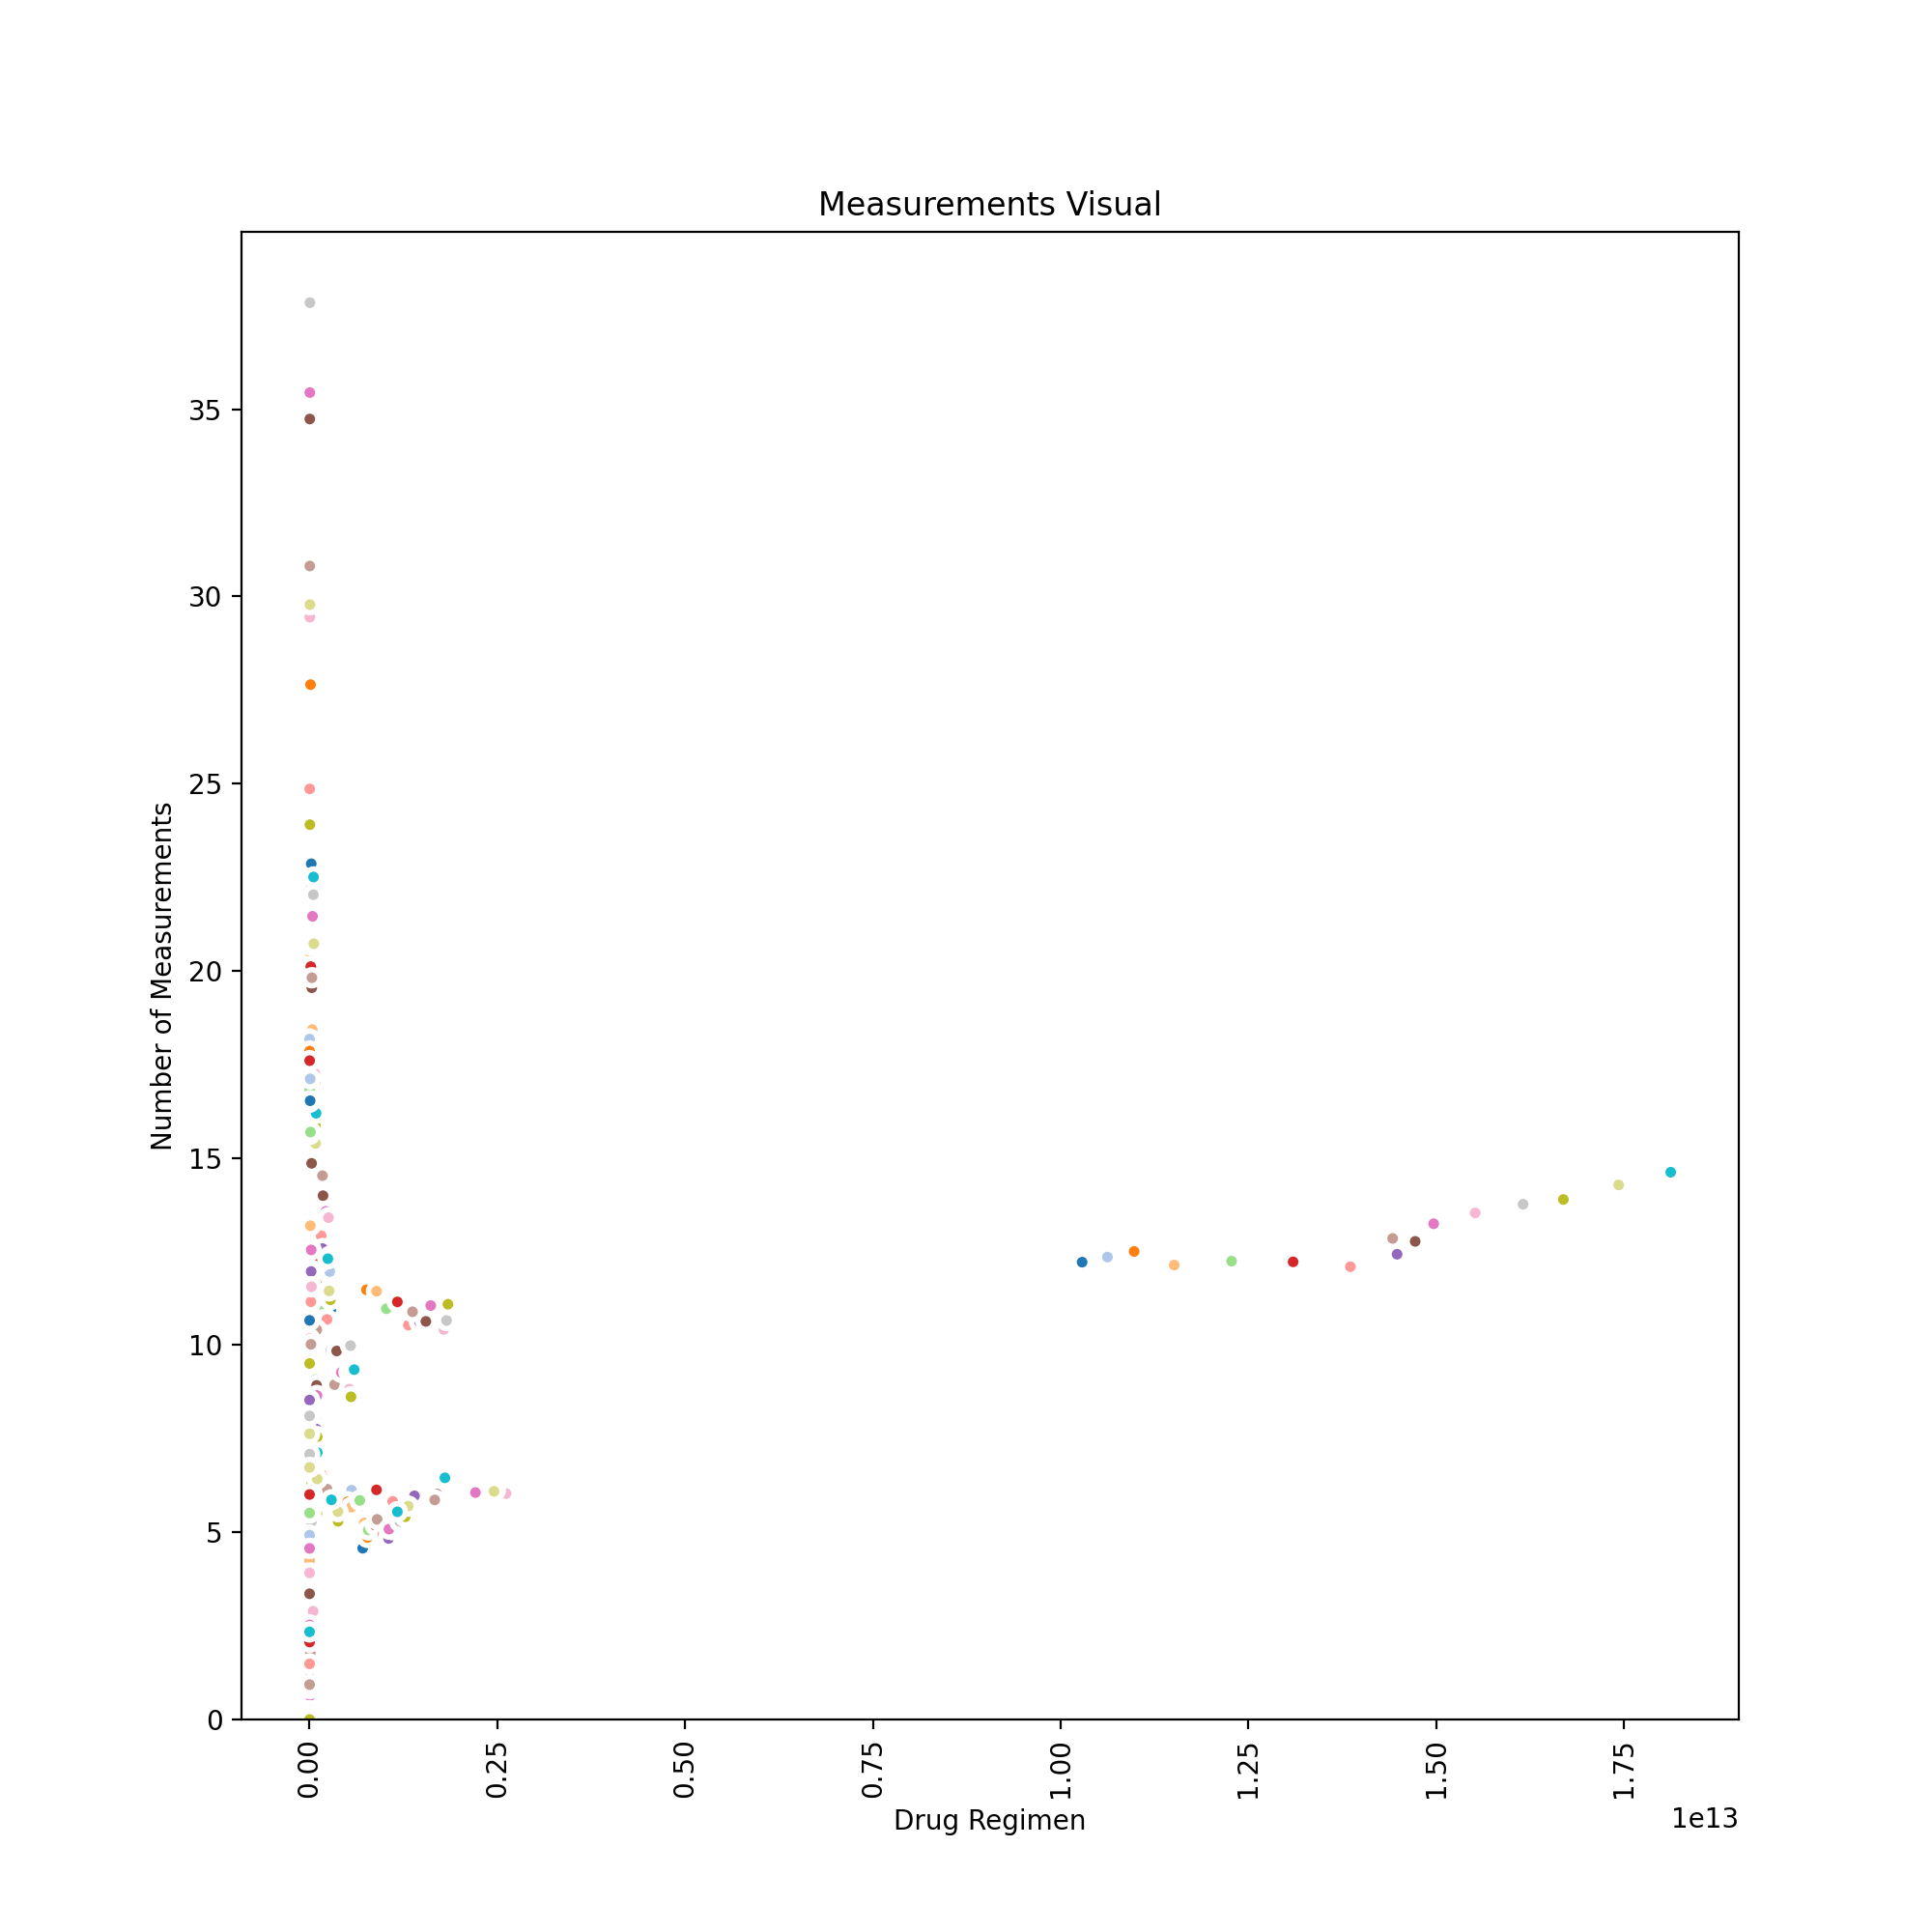

In [48]:
country_summary_reset_df["Year"] = pd.Categorical(country_summary_reset_df["Year"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
sc = plt.scatter(
    x = country_summary_reset_df["GDP Mean"], 
    y = country_summary_reset_df["Suicide Rate Mean"],  
    c = country_summary_reset_df["Year"].cat.codes,
    cmap="tab20",  
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)

plt.xlabel("GDP Mean")
plt.ylabel("Suicide Rate Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?)


# Display plot
plt.show()

In [49]:
# Group by Country, Year, Ages / find averages
age_gdp = target_countries_df.groupby(["Age Range"])["GDP(Year)"].mean()
age_suicide = target_countries_df.groupby(["Age Range"])['Suicides/100k pop'].mean()

# Create summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

age_summary_reset_df = age_summary_df.reset_index()

# Display table
age_summary_reset_df


,Age Range,GDP Mean,Suicide Rate Mean
0,05-14,7.599290e+11,0.737197
1,15-24,7.580174e+11,7.646738
2,25-34,7.580174e+11,8.946285
3,35-54,7.580174e+11,9.202154
4,55-74,7.580174e+11,9.689345
5,75+,7.580174e+11,13.538010


In [54]:
x_axis = age_summary_reset_df["GDP Mean"]
y_axis = age_summary_reset_df["Suicide Rate Mean"]

plt.bar(x_axis, y_axis, color="b", alpha=0.8, align="center")

# Set labels and title
plt.title("Measurements Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation="vertical")

# Show plot
plt.show()

In [53]:
# Group by Country, Year, Sex / find averages
sex_gdp = target_countries_df.groupby(["Country", "Sex"])["GDP(Year)"].mean()
sex_suicide = target_countries_df.groupby(["Country", "Sex"])['Suicides/100k pop'].mean()

# Creat summary table
sex_summary_df = pd.DataFrame({"GDP Mean": sex_gdp, "Suicide Rate Mean": sex_suicide})

sex_summary_reset_df = sex_summary_df.reset_index()

# Display table
sex_summary_reset_df

,Country,Sex,GDP Mean,Suicide Rate Mean
0,Antigua and Barbuda,female,1.096668e+09,0.185952
1,Antigua and Barbuda,male,1.096668e+09,1.562857
2,Argentina,female,3.455685e+11,3.373229
3,Argentina,male,3.455685e+11,16.998958
4,Bahamas,female,9.703207e+09,0.443929
5,Bahamas,male,9.703207e+09,2.170833
6,Barbados,female,4.021239e+09,0.086548
7,Barbados,male,4.021239e+09,1.583214
8,Belize,female,1.285340e+09,1.792292
9,Belize,male,1.285340e+09,13.167812


<IPython.core.display.Javascript object>


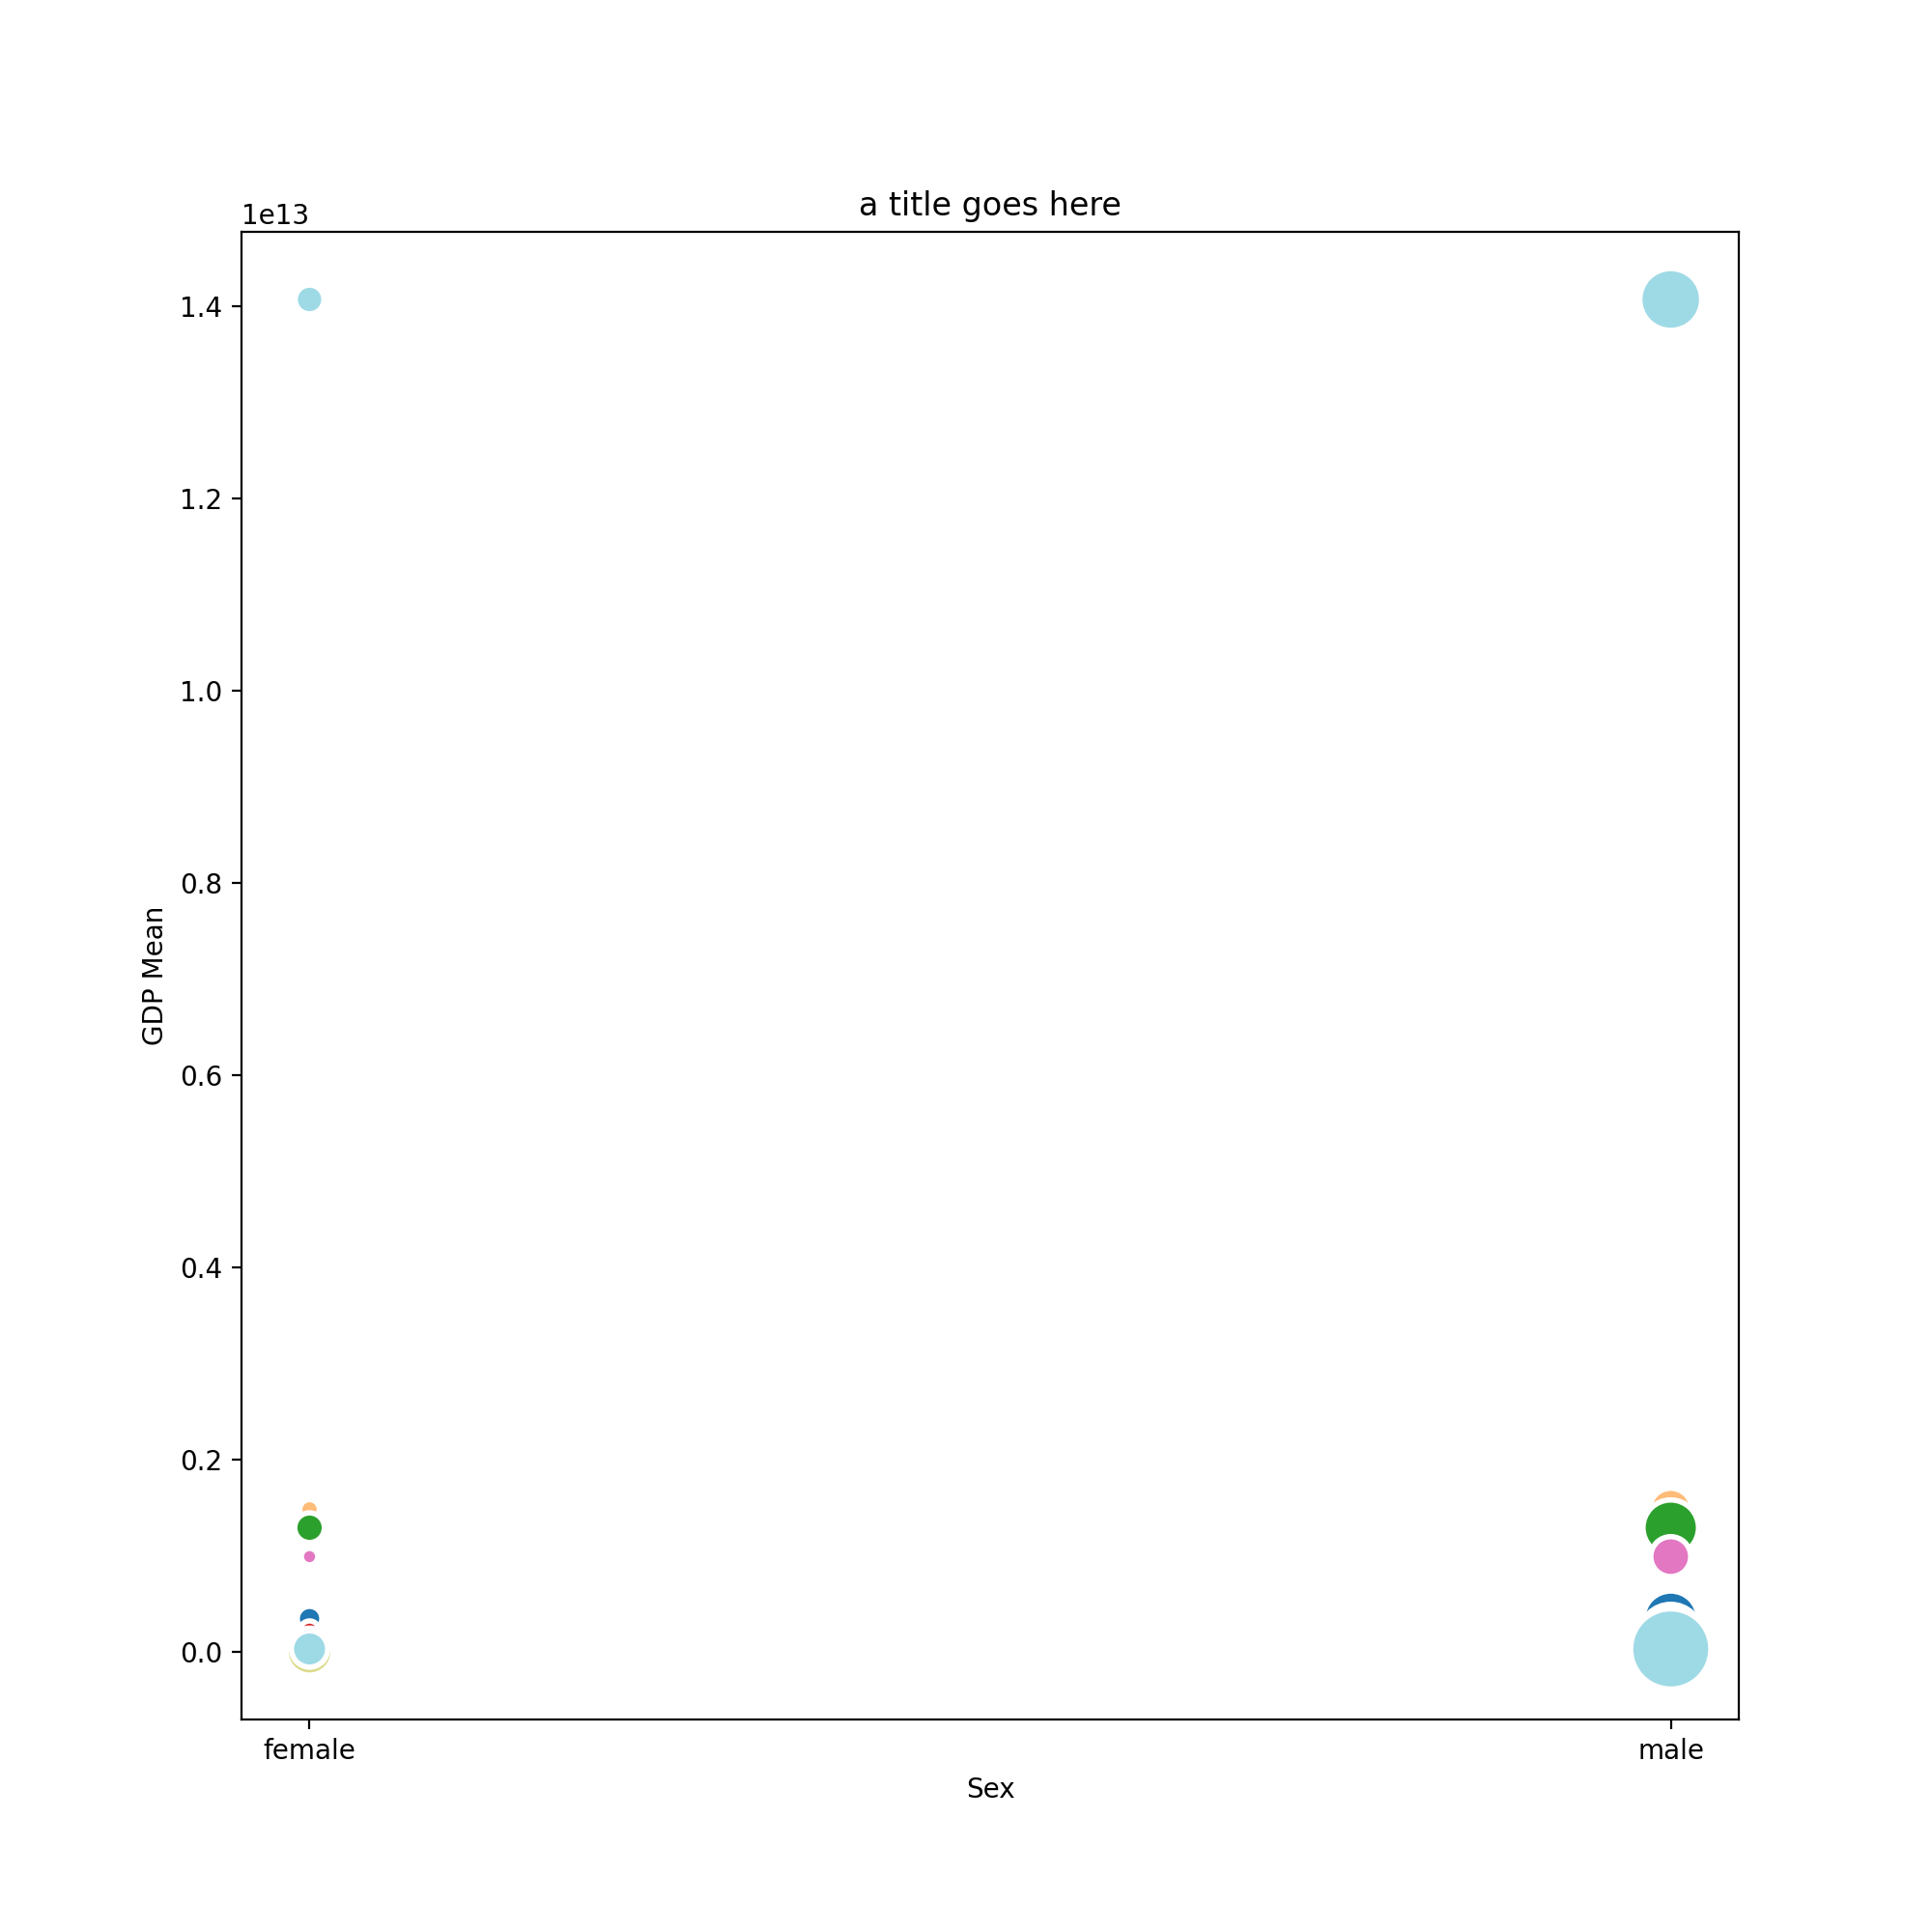

In [53]:
sex_summary_reset_df["Country"] = pd.Categorical(sex_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = sex_summary_reset_df["Sex"], 
    y = sex_summary_reset_df["GDP Mean"], 
    s = (sex_summary_reset_df["Suicide Rate Mean"]*25), 
    c = sex_summary_reset_df["Country"].cat.codes, 
    cmap="tab20", 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)

plt.xlabel("Sex")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [32]:
#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally 


In [7]:
#Country v.  Overall suicide rate
#mean_sui = filtered_date_df['Suicides/100k pop'].mean()
#filtered_date_df['Above Average?'] = (filtered_date_df['Suicides/100k pop'] >= mean_sui)

df_Country_Overall_suicide_rate = target_countries_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'
#mean_sui1 = filtered_date_df['Suicides/100k pop'].mean()
mean_sui2 = df_Country_Overall_suicide_rate.mean()
#print(mean_sui1)raw average
#print(mean_sui2)average of averages
#df_Country_Overall_suicide_rate['Suicides/100k pop'] 
#df_df_Country_Overall_suicide_rate() 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Antigua and Barbuda,0.874405,8.162069,-7.287664
Argentina,10.186094,8.162069,2.024025
Bahamas,1.307381,8.162069,-6.854688
Barbados,0.834881,8.162069,-7.327188
Belize,7.480052,8.162069,-0.682017
Brazil,5.995417,8.162069,-2.166653
Canada,10.998393,8.162069,2.836324
Chile,12.721667,8.162069,4.559597
Colombia,6.230208,8.162069,-1.931861


In [8]:
#Gender v. Country & Suicide rate
Gender_tmp_df = target_countries_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

Country              Sex   
Antigua and Barbuda  female     0.185952
                     male       1.562857
Argentina            female     3.373229
                     male      16.998958
Bahamas              female     0.443929
Name: Suicides/100k pop, dtype: float64

In [9]:
#Age Range v. Country & Suicide rate
Age_tmp_df = target_countries_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df




Country              Age Range
Antigua and Barbuda  05-14         0.000000
                     15-24         0.000000
                     25-34         0.000000
                     35-54         1.648929
                     55-74         3.597500
                                    ...    
Uruguay              15-24        15.145333
                     25-34        17.936000
                     35-54        20.285667
                     55-74        28.078333
                     75+          47.024667
Name: Suicides/100k pop, Length: 162, dtype: float64

In [10]:
#suicide rates in the United States for 2017-2019?

#suicide rates in the United States for 2013-2016?

after_start_date = renamed_df["Year"] >= 2013
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
three_year_df = target_countries_df.loc[between_two_dates]

# display sample

three_year_df.head()

,Country,Year,Sex,Age Range,Suicide Count,Suicides/100k pop,GDP(Year)
552,Antigua and Barbuda,2013,female,15-24,0,0.0,1192925407
553,Antigua and Barbuda,2013,female,25-34,0,0.0,1192925407
554,Antigua and Barbuda,2013,female,35-54,0,0.0,1192925407
555,Antigua and Barbuda,2013,female,05-14,0,0.0,1192925407
556,Antigua and Barbuda,2013,female,55-74,0,0.0,1192925407


In [11]:
three_year_df["Country"].value_counts()

Grenada                         46
Panama                          36
Belize                          36
Uruguay                         36
Guatemala                       36
Brazil                          36
Puerto Rico                     36
Chile                           36
Cuba                            36
Colombia                        36
Argentina                       36
Nicaragua                       36
Saint Vincent and Grenadines    36
United States                   36
Mexico                          36
Antigua and Barbuda             36
Ecuador                         36
Suriname                        24
Costa Rica                      24
El Salvador                     24
Saint Lucia                     24
Paraguay                        24
Canada                          12
Bahamas                         12
Barbados                        12
Name: Country, dtype: int64

In [12]:
#checking for true values
(three_year_df["Country"]=="United States").value_counts()

False    742
True      36
Name: Country, dtype: int64

In [13]:
#Build a filter for a true/false map(boolean), then apply back to the orginal data frame
us_df=three_year_df.loc[three_year_df["Country"]=="United States"]


In [14]:
#suicide rates in the United States for 2013-2016?
groupby_df=us_df.groupby("Year")["Suicide Count"].sum()

groupby_df

Year
2013    41143
2014    42769
2015    44189
Name: Suicide Count, dtype: int64

In [15]:
(three_year_df.Year==2013).value_counts()

False    478
True     300
Name: Year, dtype: int64

In [16]:
us_df

,Country,Year,Sex,Age Range,Suicide Count,Suicides/100k pop,GDP(Year)
27184,United States,2013,male,75+,2990,38.25,16691517000000
27185,United States,2013,male,55-74,8445,27.77,16691517000000
27186,United States,2013,male,35-54,11396,27.08,16691517000000
27187,United States,2013,male,25-34,5063,23.67,16691517000000
27188,United States,2013,male,15-24,3903,17.17,16691517000000
27189,United States,2013,female,35-54,3776,8.99,16691517000000
27190,United States,2013,female,55-74,2484,7.48,16691517000000
27191,United States,2013,female,25-34,1285,6.13,16691517000000
27192,United States,2013,female,15-24,975,4.49,16691517000000
27193,United States,2013,female,75+,431,3.75,16691517000000


In [17]:

three_year_df.dtypes

Country               object
Year                   int64
Sex                   object
Age Range             object
Suicide Count          int64
Suicides/100k pop    float64
GDP(Year)              int64
dtype: object

In [18]:
#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [19]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019